### LOGISTIC REGRESSION

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler


In [8]:
# prepare the dataset

X = load_breast_cancer(as_frame=True)['data']
y = load_breast_cancer()['target']

In [10]:
print(y[:5])

X.head(5)

[0 0 0 0 0]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
# split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=23, stratify=y)

In [16]:
# scale the Xs

column_names = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(data = X_train, columns=column_names)
X_test = pd.DataFrame(data=X_test, columns=column_names)


X_test.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.657610,0.331693,-1.574982,-1.257215,-0.136137,0.550433,0.559482,-0.671281,1.503215,3.015444,...,-1.459280,0.642880,-1.439467,-1.076532,1.398463,1.140422,1.308763,-0.506880,0.668476,3.690105
1,-0.534954,-0.300302,-0.562778,-0.552005,-0.678682,-0.670250,-0.597219,-0.629606,0.599224,-0.024812,...,-0.552348,-0.075139,-0.608819,-0.549314,-0.437362,-0.434709,-0.342972,-0.456989,0.342707,-0.099117
2,-1.357938,-1.225395,-1.304116,-1.108967,2.973922,0.397153,-0.665815,-0.606595,1.413533,2.170513,...,-1.161271,-1.252690,-1.155206,-0.947746,2.376384,-0.241721,-0.796214,-0.599600,1.228052,0.379605
3,-0.576730,-0.350678,-0.570876,-0.590786,0.503213,-0.080314,-0.485829,-0.375210,0.480845,-0.125007,...,-0.558397,0.017405,-0.558433,-0.557195,0.518334,-0.444077,-0.506320,-0.749273,0.242950,-0.691042
4,-1.531726,-1.099454,-1.528420,-1.193130,-0.329026,-1.130665,-1.079126,-1.225584,-0.290417,0.716933,...,-1.425003,-1.380338,-1.431312,-1.060769,-0.681842,-1.110667,-1.276457,-1.690893,-0.469379,-0.259066


#### Model Training

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

#### Model Evaluation

In [18]:
## accuracy

print(f"train_accuracy: {accuracy_score(y_train, train_preds)}")
print(f"test_accuracy: {accuracy_score(y_test, test_preds)}")

train_accuracy: 0.9882629107981221
test_accuracy: 0.986013986013986


Text(0.5, 1.0, 'Test')

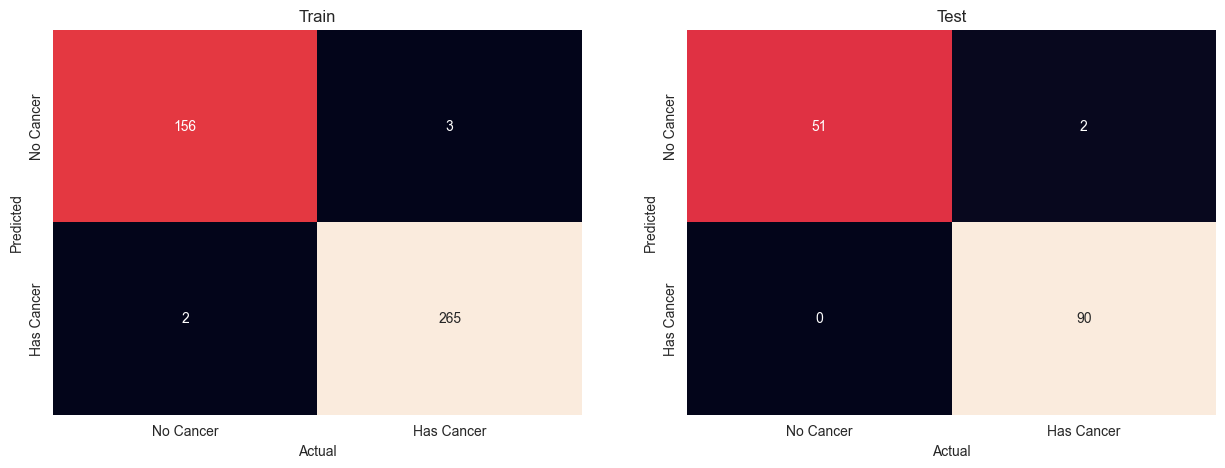

In [34]:
# confusion matrix

cols = ['No Cancer', 'Has Cancer']
train_conf = pd.DataFrame(data = confusion_matrix(y_train, train_preds), columns= cols, index=cols)
test_conf = pd.DataFrame(data = confusion_matrix(y_test, test_preds), columns= cols, index=cols)

sns.set_style('darkgrid')
sns.set_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.heatmap(data=train_conf, ax=axes[0], cbar=False, annot=True, fmt='d')
sns.heatmap(data=test_conf, ax=axes[1], cbar=False, annot=True, fmt='d')

axes[0].set_ylabel('Predicted')
axes[0].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_xlabel('Actual')
axes[0].set_title('Train')
axes[1].set_title('Test')

In [38]:
precision_score(y_train, train_preds, pos_label=0)

0.9873417721518988

In [40]:
recall_score(y_train, train_preds)

0.9925093632958801

In [39]:
265/(265+2)

0.9925093632958801

In [ ]:
f1_score(y_train, train_preds)

0.9906542056074766

In [42]:
f1_score(y_test, test_preds)

0.989010989010989

In [ ]:
# train classification

print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       159
           1       0.99      0.99      0.99       267

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



### EXERCISE

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [46]:
X = load_iris(as_frame=True)['data']
y = load_iris()['target']

In [47]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
